# Training

In [4]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [5]:
df = pd.read_csv('/work/diabetes_prediction_dataset.csv')

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
cat_cols = ["gender", "smoking_history"]
enc = OrdinalEncoder()

df[cat_cols] = enc.fit_transform(df[cat_cols])

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,4.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0


Train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("diabetes", axis=1), df["diabetes"], test_size=0.2, random_state=6)

Model architechure

In [10]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Crear el modelo base
base_model = XGBClassifier()

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=3, scoring='accuracy')

Model training

In [11]:
grid_search.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="error",
    early_stopping_rounds=500,
    verbose=10,
)

[70]	validation_0-error:0.02670
[80]	validation_0-error:0.02670
[90]	validation_0-error:0.02670
[100]	validation_0-error:0.02670
[110]	validation_0-error:0.02670
[120]	validation_0-error:0.02670
[130]	validation_0-error:0.02670
[140]	validation_0-error:0.02670
[150]	validation_0-error:0.02670
[160]	validation_0-error:0.02670
[170]	validation_0-error:0.02670
[180]	validation_0-error:0.02670
[190]	validation_0-error:0.02670
[199]	validation_0-error:0.02670
[0]	validation_0-error:0.02670
[10]	validation_0-error:0.02670
/root/venv/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/root/venv/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

Model evaluation

In [22]:
print("Model validation accuracy: %.2f%%" % (grid_search.score(X_test, y_test) * 100))

Model validation accuracy: 97.39%


In [24]:
cm = confusion_matrix(y_test, best_model.predict(X_test))
cm

array([[18283,    13],
       [  508,  1196]])

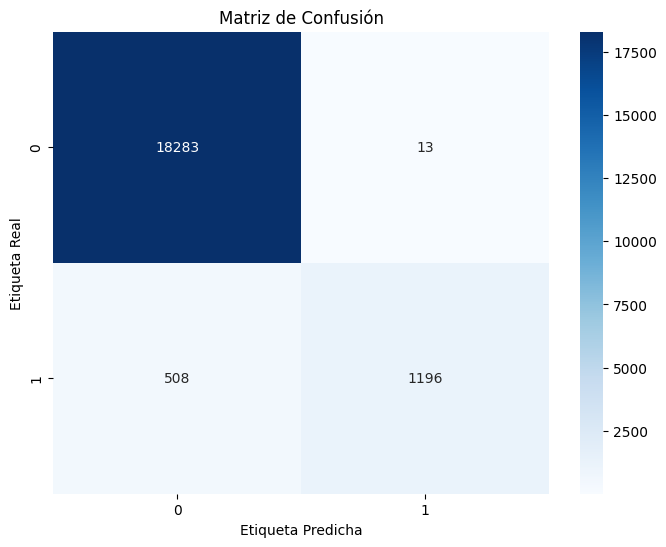

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3811282c-63b6-4ca2-ab7f-f472b62191a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>